# PART 1. Data Pre-processing

Fire the system

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from numpy import array
from math import sqrt
from sklearn.metrics import mean_squared_error
from numpy import split
from numpy import mean
from numpy import std
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from keras import Input, Model
from keras.layers import ConvLSTM2D

Read the data

In [ ]:
# download the dataset
from google.colab import drive
drive.mount("/content/drive")
# load the the file
df = pd.read_excel('/content/drive/My Drive/ArabE.xlsx',sheet_name='ArabE_Pri')

Mounted at /content/drive


Data pre-processing

In [ ]:
df.head(5)

,Date,Volume,Gross_Weight,Day_dif,Day,Week_Number,Months,Year,Season
0,2021-01-04,4.098,538.5,0,måndag,1.000000,1,2021,winter
1,2021-01-05,8.522,1521.3,1,tisdag,1.000000,1,2021,winter
2,2021-01-07,4.063,1011.8,2,torsdag,1.000000,1,2021,winter
3,2021-01-08,2.262,348.9,1,fredag,1.142857,1,2021,winter
4,2021-01-11,0.317,71.8,3,måndag,1.571429,1,2021,winter


In [ ]:
# Encode the 'Season' column which contains categorical data using pandas.factorize()
df['Year_encoded'] = pd.factorize(df['Year'])[0]
df['Season_encoded'] = pd.factorize(df['Season'])[0]
df['Day_encoded'] = pd.factorize(df['Day'])[0]

In [ ]:
df.head(5)

,Date,Volume,Gross_Weight,Day_dif,Day,Week_Number,Months,Year,Season,Year_encoded,Season_encoded,Day_encoded
0,2021-01-04,4.098,538.5,0,måndag,1.000000,1,2021,winter,0,0,0
1,2021-01-05,8.522,1521.3,1,tisdag,1.000000,1,2021,winter,0,0,1
2,2021-01-07,4.063,1011.8,2,torsdag,1.000000,1,2021,winter,0,0,2
3,2021-01-08,2.262,348.9,1,fredag,1.142857,1,2021,winter,0,0,3
4,2021-01-11,0.317,71.8,3,måndag,1.571429,1,2021,winter,0,0,0


In [ ]:
# Drop the 'Year', 'Season' and 'Day' columns since we have encoded columns
df=df.drop(['Year','Season','Day'], axis=1)
df.head(5)

,Date,Volume,Gross_Weight,Day_dif,Week_Number,Months,Year_encoded,Season_encoded,Day_encoded
0,2021-01-04,4.098,538.5,0,1.000000,1,0,0,0
1,2021-01-05,8.522,1521.3,1,1.000000,1,0,0,1
2,2021-01-07,4.063,1011.8,2,1.000000,1,0,0,2
3,2021-01-08,2.262,348.9,1,1.142857,1,0,0,3
4,2021-01-11,0.317,71.8,3,1.571429,1,0,0,0


In [ ]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            495 non-null    datetime64[ns]
 1   Volume          495 non-null    float64       
 2   Gross_Weight    495 non-null    float64       
 3   Day_dif         495 non-null    int64         
 4   Week_Number     495 non-null    float64       
 5   Months          495 non-null    int64         
 6   Year_encoded    495 non-null    int64         
 7   Season_encoded  495 non-null    int64         
 8   Day_encoded     495 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 34.9 KB


In [ ]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            495 non-null    datetime64[ns]
 1   Volume          495 non-null    float64       
 2   Gross_Weight    495 non-null    float64       
 3   Day_dif         495 non-null    int64         
 4   Week_Number     495 non-null    float64       
 5   Months          495 non-null    int64         
 6   Year_encoded    495 non-null    int64         
 7   Season_encoded  495 non-null    int64         
 8   Day_encoded     495 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 34.9 KB


In [ ]:
print("Rows", df.shape[0])
print("Columns", df.shape[1])
print("Features", df.columns.tolist())
print("Missing values", df.isnull().any())

Rows 495
Columns 9
Features ['Date', 'Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Year_encoded', 'Season_encoded', 'Day_encoded']
Missing values Date              False
Volume            False
Gross_Weight      False
Day_dif           False
Week_Number       False
Months            False
Year_encoded      False
Season_encoded    False
Day_encoded       False
dtype: bool


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

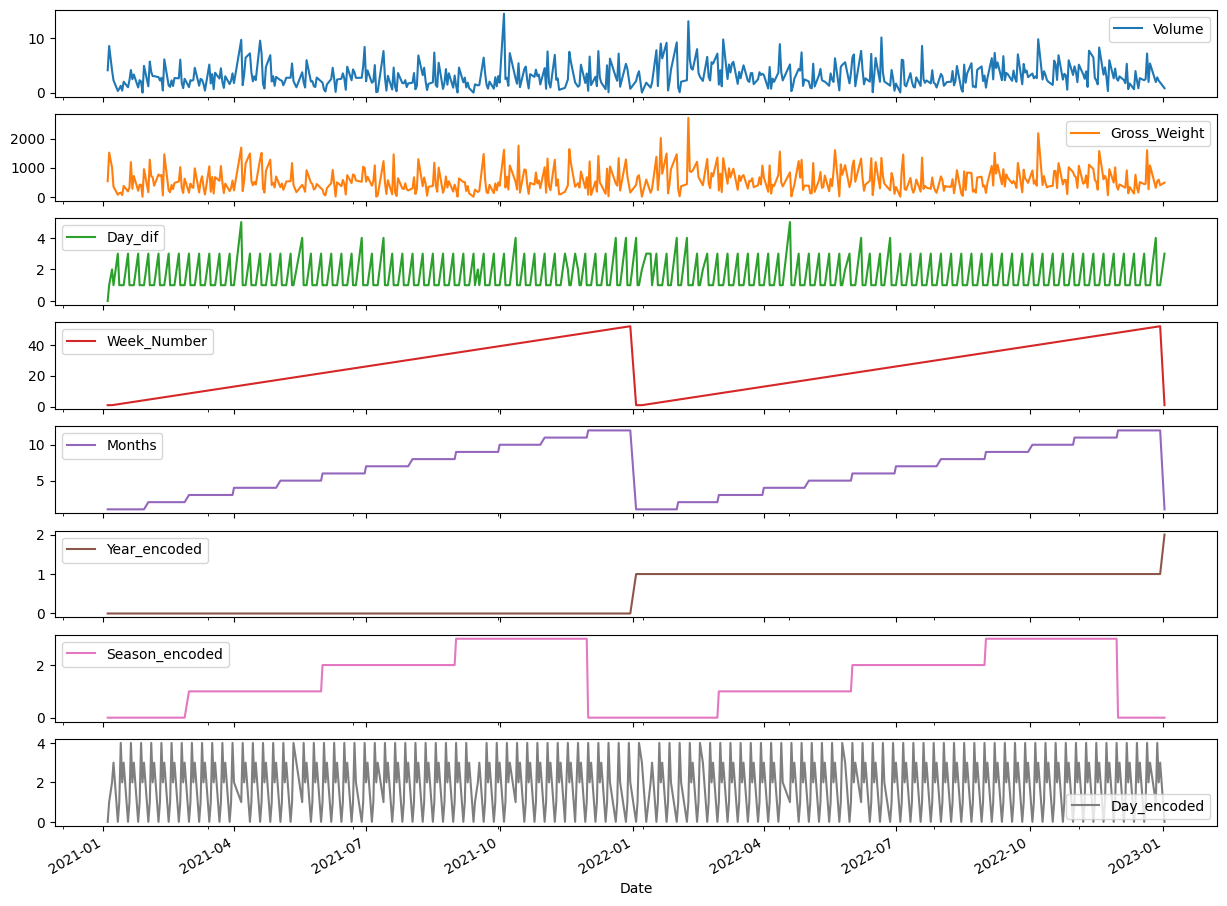

In [ ]:
# Create a plot for each of variables
df.set_index('Date')[['Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Year_encoded', 'Season_encoded', 'Day_encoded']].plot(subplots=True,figsize=(15, 12))

In [ ]:
# All variables will be my input
df_input=df[['Date','Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Year_encoded', 'Season_encoded', 'Day_encoded']]


In [ ]:
df_input.head(5)

,Date,Volume,Gross_Weight,Day_dif,Week_Number,Months,Year_encoded,Season_encoded,Day_encoded
0,2021-01-04,4.098,538.5,0,1.000000,1,0,0,0
1,2021-01-05,8.522,1521.3,1,1.000000,1,0,0,1
2,2021-01-07,4.063,1011.8,2,1.000000,1,0,0,2
3,2021-01-08,2.262,348.9,1,1.142857,1,0,0,3
4,2021-01-11,0.317,71.8,3,1.571429,1,0,0,0


In [ ]:
df_input[['Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Year_encoded', 'Season_encoded', 'Day_encoded']].describe()

,Volume,Gross_Weight,Day_dif,Week_Number,Months,Year_encoded,Season_encoded,Day_encoded
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,3.064804,561.780206,1.470707,26.382395,6.581818,0.505051,1.533333,2.000000
std,2.176914,405.647747,0.903575,14.890046,3.416570,0.504509,1.108670,1.417073
min,0.014000,0.700000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.545000,274.090000,1.000000,13.500000,4.000000,0.000000,1.000000,1.000000
50%,2.498000,460.060000,1.000000,26.714286,7.000000,1.000000,2.000000,2.000000
75%,4.108000,748.490000,1.000000,39.071429,9.500000,1.000000,3.000000,3.000000
max,14.403000,2716.940000,5.000000,52.000000,12.000000,2.000000,3.000000,4.000000


In [ ]:
# Remove the outliers from the dataset
# Calculate the first and third quartiles
q1 = df_input['Volume'].quantile(0.25)
q3 = df_input['Volume'].quantile(0.75)

# Calculate the interquartile range
iqr = q3 - q1

# Determine the upper and lower limits for outliers
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

df_input = df_input[(df_input['Volume'] >= lower_limit) & (df_input['Volume'] <= upper_limit)]


In [ ]:
df_input

,Date,Volume,Gross_Weight,Day_dif,Week_Number,Months,Year_encoded,Season_encoded,Day_encoded
0,2021-01-04,4.098,538.50,0,1.000000,1,0,0,0
2,2021-01-07,4.063,1011.80,2,1.000000,1,0,0,2
3,2021-01-08,2.262,348.90,1,1.142857,1,0,0,3
4,2021-01-11,0.317,71.80,3,1.571429,1,0,0,0
5,2021-01-12,0.748,128.90,1,1.714286,1,0,0,1
...,...,...,...,...,...,...,...,...,...
490,2022-12-27,1.948,310.82,4,51.571429,12,1,0,1
491,2022-12-28,2.800,539.08,1,51.714286,12,1,0,4
492,2022-12-29,2.202,591.38,1,51.857143,12,1,0,2
493,2022-12-30,1.868,398.46,1,52.000000,12,1,0,3


In [ ]:
# Outliers are eliminated
df_input.describe()

,Volume,Gross_Weight,Day_dif,Week_Number,Months,Year_encoded,Season_encoded,Day_encoded
count,480.000000,480.0000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,2.856717,528.9924,1.458333,26.634524,6.639583,0.500000,1.541667,2.018750
std,1.835171,359.1174,0.885002,14.832728,3.401660,0.504675,1.107167,1.417775
min,0.014000,0.7000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.514500,266.8050,1.000000,13.821429,4.000000,0.000000,1.000000,1.000000
50%,2.419000,450.6750,1.000000,26.928571,7.000000,0.000000,2.000000,2.000000
75%,3.898250,715.3700,1.000000,39.214286,10.000000,1.000000,3.000000,3.000000
max,7.943000,1761.9800,5.000000,52.000000,12.000000,2.000000,3.000000,4.000000


In [ ]:
aq_corr=df_input[['Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Year_encoded', 'Season_encoded', 'Day_encoded']].corr(method='pearson')
aq_corr

,Volume,Gross_Weight,Day_dif,Week_Number,Months,Year_encoded,Season_encoded,Day_encoded
Volume,1.000000,0.936252,-0.011297,0.034111,0.031057,0.125214,0.025590,0.020707
Gross_Weight,0.936252,1.000000,-0.004167,0.011160,0.008923,0.091889,0.004544,0.008732
Day_dif,-0.011297,-0.004167,1.000000,-0.010568,-0.012280,0.028045,-0.021661,-0.660754
Week_Number,0.034111,0.011160,-0.010568,1.000000,0.996411,0.021634,0.559007,0.008240
Months,0.031057,0.008923,-0.012280,0.996411,1.000000,0.022497,0.560810,0.008763
Year_encoded,0.125214,0.091889,0.028045,0.021634,0.022497,1.000000,0.014945,-0.007294
Season_encoded,0.025590,0.004544,-0.021661,0.559007,0.560810,0.014945,1.000000,0.002826
Day_encoded,0.020707,0.008732,-0.660754,0.008240,0.008763,-0.007294,0.002826,1.000000


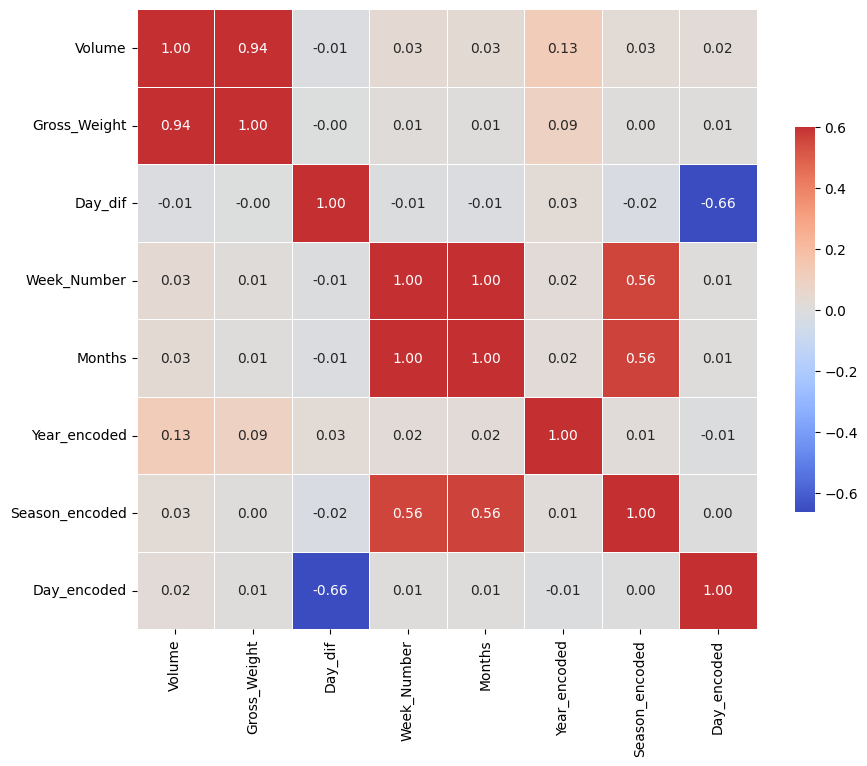

In [ ]:
g = sns.heatmap(aq_corr,  vmax=.6, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10,10)
    
pyplot.show()

In [ ]:
# standardize the dataset
#df_input=df_input[['Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Year_encoded', 'Season_encoded', 'Day_encoded']]

#scaler= StandardScaler()
#scaler=scaler.fit(df_input)
#df_input=scaler.transform(df_input)

The function named 'split_dataset' which takes a pandas DataFrame object 'df_input' as an argument, and it returns two numpy arrays 'train' and 'test' containing the training and testing sets of the original dataset. Finally, the 'split' function of numpy restructures the training and testing sets into equal bulks. Each bulk contains equal rows. In that way, 'split' function splits the arrays along a given axis into multiple sub-arrays.

In [ ]:
# split a dataset into train/test sets
def split_dataset(df_input,t):
  train, test = df_input[0:t], df_input[t:]

  #print("trainlen",len(train))
  #print("testlen",len(test))

  # restructure bulks equally
  # by using 'split' function, dataframe is converted to numpy array from 2d to 3d
  train = array(split(train, len(train)/bulks))
  test = array(split(test, len(test)/bulks))

  #print("train",train)
  #print("test",test) 
  return train, test

This function evaluates the accuracy of a set of predicted values against their corresponding actual values. It calculates the Root Mean Squared Error (RMSE) for each day, and an overall RMSE for the entire set of predicted values.

The function takes in two numpy arrays: "actual" and "predicted". "actual" is a 2D array where each row represents a day and each column represents a variable. "predicted" is also a 2D array with the same shape as "actual". Each element in "predicted" represents the predicted value for the corresponding element in "actual".

The function first calculates the RMSE for each day by calling the "mean_squared_error" function from the "sklearn.metrics" library and then taking the square root of the result. The RMSE scores for each day are stored in a list called "scores".

Next, the function calculates an overall RMSE for the entire set of predicted values. It does this by first summing the squared differences between each predicted and actual value, and then dividing by the total number of elements in the arrays. The square root of this result gives the overall RMSE score.

Finally, the function returns both the overall RMSE and the list of RMSE scores for each day.

In [ ]:
# evaluate one or more forecasts against expected values
def evaluate_forecasts(actual, predicted):
  scores = list()
  #print("actual",actual)
  #print("predicted",predicted)
  
  # calculate an RMSE score for each day
  for i in range(actual.shape[1]):
    # calculate mse
    mse = mean_squared_error(actual[:, i], predicted[:, i])
    #print("Actual",actual[:, i])
    #print("Predicted", predicted[:, i])

    # calculate rmse
    rmse = sqrt(mse)
    # store
    scores.append(rmse)

  # calculate overall RMSE
  s = 0
  for row in range(actual.shape[0]):
    for col in range(actual.shape[1]):
      s += (actual[row, col] - predicted[row, col])**2
  score = sqrt(s / (actual.shape[0] * actual.shape[1]))

  #print("Actul shape",actual.shape)
  #print("Actul",actual)
  #print("Predicted shape",predicted.shape)
  #print("Predicted",predicted)

  return score, scores

This function summarizes the RMSE scores calculated by the "evaluate_forecasts" function. It takes in three arguments: "name" is a string that specifies the name of the model or forecast being evaluated, "score" is the overall RMSE score calculated by the "evaluate_forecasts" function, and "scores" is the list of RMSE scores calculated for each day.

The function first calculates the mean and standard deviation of the list of RMSE scores using the "mean" and "std" functions from the numpy library. It then prints a summary of the results in the format of "model name: mean RMSE (+/- standard deviation)" using the "print" function.

Finally, the function creates a box and whisker plot of the RMSE scores using the "boxplot" function from the matplotlib.pyplot library. This plot shows the distribution of the RMSE scores, including the median, quartiles, and outliers. The plot is displayed using the "show" function.

In [ ]:
# summarize scores
def summarize_scores(name, score, scores):
  # print a summary
  scores_m, score_std = mean(scores), std(scores)
  print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
  
  # box and whisker plot
  pyplot.boxplot(scores)
  pyplot.show()

This 'to_supervised' function takes three arguments:

dt: a three-dimensional numpy array representing time series data

n_input: the number of time steps to use as input. we can call it as window

n_out: the number of time steps to use as output

The function first flattens the input data into a 2d array. It then defines two empty lists, X and y, to hold the input/output sequences.

The function then loops over each time step (window) in the flattened data array. For each time step, it defines the start and end indices for the input sequence (in_start and in_end) and the end indices for the output sequence (out_end). If there is enough data to form an instance with n_input input time steps and n_out output time steps, the input sequence (X) is appended to the X list and the output sequence (y) is appended to the y list.

Finally, the function returns two numpy arrays, X and y, that contain the input/output sequences.

In [ ]:
# convert history into inputs and outputs
def to_supervised(dt, n_input, n_out=5):
  # flatten data
  data_2d = dt.reshape((dt.shape[0]*dt.shape[1], dt.shape[2]))         #2d

  #print("train.shape[0] train.shape[1] train.shape[2]",dt.shape[0], dt.shape[1], dt.shape[2])
  #print("data after flatting it",data_2d)
  #print("data_2d.shape",data_2d.shape)

  X, y = list(), list()
  in_start = 0
  # step over the entire history one time step at a time
  for _ in range(len(data_2d)):
    # define the end of the input sequence. in_end and out_end indicate index number of the data
    in_end = in_start + n_input
    #print("in_end",in_end)
    out_end = in_end + n_out
    #print("out_end",out_end)
    
    # ensure we have enough data for this instance
    if out_end <= len(data_2d):
      X.append(data_2d[in_start:in_end, :])      #take all features
      y.append(data_2d[in_end:out_end, 0])       #take only the first column of the dataset as a target feature
    # move along one time step
    in_start += 1
  
  #print("array(X)", array(X))
  #print("array(y)", array(y))
  #print("array(X).shape", array(X).shape)
  #print("array(y).shape", array(y).shape)
  
  return array(X), array(y)

This code defines a function called build_model that takes three arguments:

train: a three-dimensional numpy array representing training time series data

test: a three-dimensional numpy array representing testing time series data

n_input: an integer representing the number of time steps to use as input

The function first calls the to_supervised function to convert the training and testing data into input/output sequences, which are stored in the train_x, train_y, test_x, and test_y variables.

It then defines the verbose, epochs, and batch_size parameters for training the model, as well as the number of time steps (n_timesteps), number of features (n_features), and number of outputs (n_outputs) for the input and output sequences.

The function reshapes the train_y array to have a shape of (number of samples, n_outputs, 1) in order to match the expected shape of the model output.

The function then defines a sequential model using the Keras API. The model consists of an LSTM layer with 200 units, a RepeatVector layer to repeat the output of the LSTM layer n_outputs times, another LSTM layer with 200 units that returns sequences, two TimeDistributed dense layers with 100 and 1 units respectively, and is compiled with mean squared error (MSE) loss and the Adam optimizer.

The function uses early stopping to stop training when the validation loss stops improving, and fits the model to the training data using the fit method.

After training, the function plots the training and validation loss history using pyplot from the matplotlib library, and prints a summary of the model architecture using the summary method.

Finally, the function returns the trained model, train_x, and train_y.

The pd.date_range() function is used to generate a sequence of dates based on the last date in the test_date. n_future, which is the number of future dates we want to predict. The freq='1d' argument specifies that we want to generate dates at a daily frequency.

In [ ]:
# train the model
def build_model(train, test, n_input, test_date):
  # prepare data
  train_x, train_y = to_supervised(train, n_input)    # array(X)==> 3d, array(y)==> 2d which comes to here

  # Here train_x is 3d but train_y is 2d but LSTMs  work with 3d data
  #print("train_x",train_x)
  #print("train_y",train_y)
  #print("test",test)
  #print("test",test.shape)

  test_x, test_y= to_supervised(test, n_input)       # array(X)==> 3d, array(y)==> 2d which come to here
  #print("test_x.shape[0]",test_x.shape[0])
  #print("test_x.shape[1]",test_x.shape[1])
  #print("test_x.shape[2]",test_x.shape[2])
  #print("test_x",test_x)
  #print("test_y",test_y)
  #print("test_x.shape",test_x.shape)
  #print("test_y.shape",test_y.shape)
  
  # define parameters
  verbose, epochs, batch_size = 0, 100, 16
  n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
  
  # reshape output into [samples, timesteps, features]
  # Here train_y converted from 2d to 3d before implementation of LSTM algorithm
  train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
  #print("train_y.shape[0]",train_y.shape[0])
  #print("train_y.shape[1]",train_y.shape[1])

  #print("train_x",train_x)
  #print("train_y",train_y)
  #print("train_x.shape",train_x.shape)
  #print("train_y.shape",train_y.shape)
  
  # define model
  #model = Sequential()
  #model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
  #model.add(RepeatVector(n_outputs))
  #model.add(LSTM(200, activation='relu', return_sequences=True))
  #model.add(TimeDistributed(Dense(100, activation='relu')))
  #model.add(TimeDistributed(Dense(1)))
  #model.compile(loss='mse', optimizer='adam', metrics=['mse','mae', 'mape'])

  # reshape input data to match the expected shape of the model
  train_x = train_x.reshape((train_x.shape[0], 3, 1, 3, 8))
  test_x = test_x.reshape((test_x.shape[0], 3, 1, 3, 8))

  # define model
  model = Sequential()
  model.add(ConvLSTM2D(64, (1,3), activation='relu', input_shape=(n_timesteps, 1, n_input, n_features)))
  model.add(Flatten())
  model.add(RepeatVector(n_outputs))
  model.add(LSTM(200, activation='relu', return_sequences=True))
  model.add(TimeDistributed(Dense(100, activation='relu')))
  model.add(TimeDistributed(Dense(1)))
  model.compile(loss='mse', optimizer='adam', metrics=['mse','mae', 'mape'])




  # fit network
  #model_history=model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
  
  # Early Stopping
  early_stopping = EarlyStopping(patience=10,min_delta=0.001,monitor="val_loss",restore_best_weights=True)
  model_history= model.fit(train_x, train_y, shuffle=False, epochs=epochs, validation_data=(test_x, test_y), batch_size=batch_size, verbose=0, callbacks=[early_stopping])
  
  # inverse_transform the dataset
  #scaler= StandardScaler()
  #scaler=scaler.fit(model_history)
  #model_history=scaler.inverse_transform(model_history)

  # plot metrics
  pyplot.plot(model_history.history['mse'],label='mean_squared_error')
  pyplot.plot(model_history.history['mae'],label='mean_absolute_error')
  pyplot.plot(model_history.history['mape'],label='mean_absolute_percentage_error')
  pyplot.xlabel('epocs', fontsize=20)
  pyplot.ylabel('loss', fontsize=20)
  pyplot.legend()
  pyplot.show()

  # plot loss during training
  fig = pyplot.figure(figsize=(8, 4))
  pyplot.title('Model Loss')
  pyplot.plot(model_history.history['loss'], label='Train Loss')
  pyplot.plot(model_history.history['val_loss'], label='Test/Validation Loss')
  pyplot.xlabel('epocs', fontsize=20)
  pyplot.ylabel('loss', fontsize=20)
  pyplot.legend()
  pyplot.show()

  # print the model summary
  model.summary()
  return model, train_x, train_y, test_x

model: a machine learning model used to make predictions

history: a list of historical data used as input to the model

n_input: the number of past time steps used as input to the model

The function first flattens the history data into a 2D array and retrieves the last n_input time steps as the input data for the forecast. The input data is then reshaped into a 3D array with shape [1, n_input, n] where n is the number of features in the data. The model is used to predict the output values for the next time step based on the input data. The predicted output values are returned as a 1D array.

In [ ]:
# make a forecast
def forecast(model, history, n_input):
  #print("data history",history)
  #print("data history shape",len(history))
  
  # flatten data
  data = array(history)      
  #print("history",data)
  data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))  #2d
  #print("Flattened data",data)
  
  # retrieve last observations for input data
  input_x = data[-n_input:, :]         
  # reshape into [1, n_input, n]
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
  #print("BEFORE model",input_x)
  #print("BEFORE model shape",input_x.shape)
  
  # forecast
  yhat = model.predict(input_x, verbose=0)
  #print("yhat",yhat)
  # we only want the vector forecast
  yhat = yhat[0]
  
  return yhat

train: a 3D numpy array of historical training data

test: a 3D numpy array of historical test data

n_input: the number of past time steps used as input to the model

The function first builds a machine learning model by calling build_model function and passing in the train, test, and n_input arguments. The history variable is then initialized with a copy of the train data. The function then loops through each week of the test data and performs a walk-forward validation. It predicts the target variable using the forecast function, which takes in the machine learning model, the history data, and the n_input argument. The predicted target variable for each week is stored in the predictions list, and the real observation for each week is added to the history variable for predicting the next week. After all the predictions have been made, the function evaluates the quality of the predictions by calling evaluate_forecasts function and passing in the true test data and the predicted predictions data. The function returns a score and a list of scores for each week, as well as the predicted predictions and history data.

In [ ]:
   # evaluate the model
def evaluate_model(train, test, n_input,test_date):
  # fit model
  model, train_x, train_y, test_x= build_model(train,test,n_input,test_date)
  #print("train_x, train_y", len(train_x), len(train_y))

  # history is a list of data.
  #print("ttrain",train)
  #print("ttrain shape",train.shape)
  #print("ttest",test)
  history = [x for x in train]      #It holds all training dataset
  #print("history",history)
  #print("history type",type(history))

  # walk-forward validation
  predictions = list()
  for i in range(len(test)):
    # prediction
    yhat_sequence = forecast(model, history, n_input)    #predicted target variables
    # store the predictions
    predictions.append(yhat_sequence)
    # get real observation and add to history for predicting the next week
    history.append(test[i, :])

  #print("history_last",history)
  #print("predictions_last",predictions)

  # evaluate predictions days for each divided part
  predictions = array(predictions)
  #print("predictions",predictions)

  score, scores = evaluate_forecasts(test[:, :, 0], predictions)

  # Dimension of the prediction variable is reduced from 2d to 1d
  predicted_1d=list()
  for i in predictions:
    predicted_1d.extend(i)

  #print("predictions",predicted_1d)
  #print("test",test)

  # Dimension of the test data is reduced from 3d to 1d
  test_1d=test[:,:,0]

  actual_1d=list()
  for i in test_1d:
    actual_1d.extend(i)
  
  #print("actual",actual_1d)
  #print("predicted_1d",predicted_1d)

  # Generate list of sequence of days for predictions of future. Weekdays are generated only. 'B' represents the business days
  n_future=10
  forecast_period_dates=pd.date_range(list(test_date)[-1],periods=n_future,freq='B').tolist()
  # Extracting only the date part using the `date()` method
  forecast_period_dates = [d.date() for d in forecast_period_dates]
  #print("datelist_future_",forecast_period_dates)
  
  # future forecast
  future_forecast=model.predict(test_x[-2:])
  # flatten the array to remove extra dimensions
  future_forecast = future_forecast.flatten()

  #forecast=model.predict(test_x[-n_future:])
  print("future_forecast",future_forecast)

  # plotting
  plt.figure(figsize=(10, 4))
  plt.title("Actual-Predicted")
  plt.xlabel("Records")
  plt.ylabel("Volume (M3)")
  plt.plot(test_date,actual_1d, label='Actual Test Data', color ="green")
  plt.plot(test_date,predicted_1d, label='Predictions', color ="red")
  plt.plot(forecast_period_dates,future_forecast, label='Future Predictions', color ="blue")

  plt.legend()
  plt.show()

  return score, scores, predicted_1d, model

In [ ]:
# split dataset into standard bulks
# 0.20-testing dataset, 0.80-training dataset 
p=0.20
bulks=5  #in every bulk 5 sample will be stored
n=int(len(df_input)-len(df_input)*p)
k=int(n%bulks)      #remaining
t=n-k       #training dataset reach until this place
s=int(len(df_input)-t)%bulks        #last remanining
  
# take 'Date' column
train, test = df_input[0:t], df_input[t:]
test_date=test['Date']
#print("test_date",test_date)

# eliminate the 'Date' column
df_input=df_input[['Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Year_encoded', 'Season_encoded', 'Day_encoded']]

# split into train and test
train, test = split_dataset(df_input,t)

# evaluate model and get scores
n_input = 3      #the size of the input for making a forecast
score, scores, predicted_1d, model= evaluate_model(train, test, n_input,test_date)

# summarize scores
summarize_scores('mlp', score, scores)
# plot scores
days = ['1st', '2nd', '3rd', '4th', '5th']   #the size of the bulks which we mentioned while spliting the dataset at the begining and the the day numbers should be equal
pyplot.plot(days, scores, marker='o', label='mlp')
pyplot.show()

KeyError: ignored